In [10]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from collections import Counter
from sklearn.svm import SVC
import seaborn as sns
from imblearn.over_sampling import *
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import RandomOverSampler 
from imblearn.ensemble import *
from imblearn.combine import *
from matplotlib import rc
import matplotlib.pyplot as plt

In [ ]:
# check scikit-learn version
import sklearn
print('sklearn: %s' % sklearn.__version__)

sklearn: 0.22.2.post1


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/WSDM_train_full_features.csv', encoding='UTF-8')

In [3]:
df = pd.read_csv("WSDM_train_full_features.csv")

In [ ]:
target0_df = df[df["target"]==0]
target1_df = df[df["target"]==1]

1    50.351708
0    49.648292
Name: target, dtype: float64


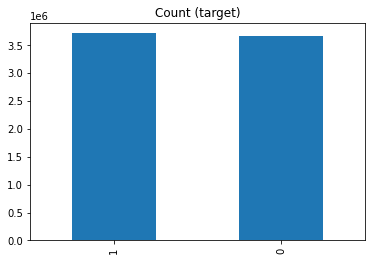

In [ ]:
df.target.value_counts().plot(kind='bar', title='Count (target)')
print(df.target.value_counts(normalize=True)*100)

# 1이 10% 0이 90%

In [ ]:
target0_df.shape[0]/9

406973.55555555556

0    89.99999
1    10.00001
Name: target, dtype: float64


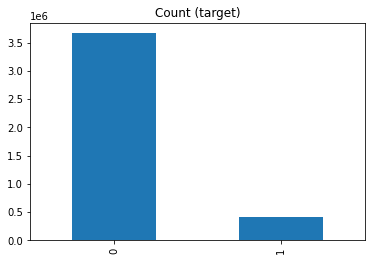

In [ ]:
target1_df10 = target1_df.sample(n=406974) # 10퍼센트
df_10=pd.concat([target0_df,target1_df10],axis=0)
df_10.target.value_counts().plot(kind='bar', title='Count (target)')
print(df_10.target.value_counts(normalize=True)*100)

In [ ]:
df_10

,target,user_idx,song_idx,ssn_idx,sst_idx,st_idx,song_length,genr_idx,art_idx,com_idx,lyr_idx,lan_idx,bd,date_diff,date_diff2,city_idx,gend_idx,regi_idx,year,nat_idx,lyricists_count,composer_count,is_featured,artist_count,artist_composer,artist_composer_lyricist,song_lang_boolean,smaller_song,count_song_played,count_artist_played
12,0,3,12,2,1,3,280084,0,7,181,1794,0,0,847,0,0,0,2,3,0,0,1,0,0,0,0,0,0,5740,115325
18,0,3,18,2,1,3,265743,0,7,8,23217,0,0,847,0,0,0,2,4,0,0,1,0,0,0,0,0,0,2284,115325
24,0,6,24,4,1,0,292060,14,2338,308,2,2,18,711,0,3,2,1,7,3,0,2,0,0,0,0,0,0,6,715
25,0,6,25,4,1,0,131239,14,1693,308,2,2,18,711,0,3,2,1,11,3,0,2,0,0,0,0,0,1,1,1768
26,0,6,26,4,1,0,307200,0,90069,2,2,2,18,711,0,3,2,1,19,2,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152918,1,4927,8352,1,1,2,282435,0,28,26,20,0,27,1031,0,10,1,2,4,0,0,1,0,0,0,0,0,0,1083,182088
7217322,1,30442,305089,4,3,0,236400,21,41,33182,6627,1,0,304,0,0,0,1,0,0,0,2,0,0,0,0,0,1,2014,3384
7326446,1,17498,20991,1,1,4,261955,18,3434,111049,44006,0,0,1687,0,0,0,0,5,0,2,3,0,0,0,0,0,0,120,7475
1359466,1,1687,21499,1,1,2,294400,0,1156,2,2,0,26,1398,23,9,2,3,8,0,0,1,0,0,0,0,0,0,351,40309


In [ ]:
X = df_10.drop(columns=['target'])
y = df_10["target"]

In [ ]:
y_train.value_counts()


0    2929843
1     325945
Name: target, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
#Training with imbalance data
RF = RandomForestClassifier(random_state=0,n_jobs=-1)
RF.fit(X_train,y_train)
pred = pd.DataFrame(RF.predict(X_test))
pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
813943,0
813944,0
813945,0
813946,0


In [ ]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba=pd.DataFrame(RF.predict_proba(X_test)[:, 1])
pred_proba

,0
0,0.04
1,0.07
2,0.33
3,0.04
4,0.28
...,...
813943,0.16
813944,0.02
813945,0.30
813946,0.16


In [ ]:
#imbalance data with Accuracy
print("accuracy:", accuracy_score(y_test, pred))
#imbalance data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y_test,pred_proba))
#imbalance data with Recall
print("recall:",recall_score(y_test, pred))
#imbalance data with Precision
print("precision:",precision_score(y_test, pred))
#imbalance data with F1-score
print("f1-score:",f1_score(y_test, pred))

accuracy: 0.899014433354465
roc-auc-score: 0.7189822943188334
recall: 0.029495612681879328
precision: 0.40181573638197715
f1-score: 0.05495705761293216


# RandomOverSampling

In [ ]:
print('Original dataset shape %s' % Counter(y))
#Original dataset shape Counter({0: 3662762, 1: 36998})
ros = RandomOverSampler(random_state=0)

X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
#Resampled dataset shape Counter({0: 2930203, 1: 2930203})

Original dataset shape Counter({0: 3662762, 1: 406974})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({0: 2929843, 1: 2929843})


In [ ]:
#Training with imbalance data
RF = RandomForestClassifier(random_state=0,n_jobs=-1)
RF.fit(X_res, y_res)

pred = pd.DataFrame(RF.predict(X_test))
pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
813943,0
813944,0
813945,0
813946,0


In [ ]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba = pd.DataFrame(RF.predict_proba(X_test)[:, 1])
pred_proba

,0
0,0.02
1,0.10
2,0.16
3,0.15
4,0.26
...,...
813943,0.16
813944,0.06
813945,0.16
813946,0.36


In [ ]:
#imbalance data with Accuracy
print("accuracy:", accuracy_score(y_test, pred))
#imbalance data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y_test,pred_proba))
#imbalance data with Recall
print("recall:",recall_score(y_test, pred))
#imbalance data with Precision
print("precision:",precision_score(y_test, pred))
#imbalance data with F1-score
print("f1-score:",f1_score(y_test, pred))

accuracy: 0.8922511020360023
roc-auc-score: 0.7217030098672353
recall: 0.07440545977366128
precision: 0.3218728311355507
f1-score: 0.12087008821170811


# SMOTE

In [ ]:
#importing SMOTE
from imblearn.over_sampling import *
#Oversampling the data
#Training with oversampled data
RF=RandomForestClassifier(random_state=0,n_jobs=-1)
X_sm, y_sm = SMOTE(random_state=0,k_neighbors=5,n_jobs=-1).fit_resample(X_train, y_train)
RF.fit(X_sm,y_sm)
pred_sm=pd.DataFrame(RF.predict(X_test))
pred_sm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,0
0,0
1,0
2,0
3,0
4,0
...,...
813943,0
813944,0
813945,0
813946,0


In [ ]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba=pd.DataFrame(RF.predict_proba(X_test)[:, 1])
pred_proba

,0
0,0.03
1,0.12
2,0.21
3,0.06
4,0.40
...,...
813943,0.42
813944,0.01
813945,0.16
813946,0.38


In [ ]:
#smote data with Accuracy
print("accuracy:", accuracy_score(y_test, pred_sm))
#smote data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y_test,pred_proba))
#smote data with Recall
print("recall:",recall_score(y_test, pred_sm))
#smote data with Precision
print("precision:",precision_score(y_test, pred_sm))
#smote data with F1-score
print("f1-score:",f1_score(y_test, pred_sm))

accuracy: 0.8815759729122745
roc-auc-score: 0.728387006990153
recall: 0.1812807760184625
precision: 0.32831917746982564
f1-score: 0.23358697294245798


# Borderline Smote - 1

In [ ]:
oversample = BorderlineSMOTE(sampling_strategy='auto', random_state=0, 
                             k_neighbors=5, n_jobs = -1, m_neighbors=10, kind='borderline-1')
X_Bsm, y_Bsm = oversample.fit_resample(X_train, y_train)

#Training with oversampled data
RF = RandomForestClassifier(random_state=0,n_jobs=-1)
RF.fit(X_Bsm, y_Bsm)

pred_Bsm = pd.DataFrame(RF.predict(X_test))
pred_Bsm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,0
0,0
1,0
2,0
3,0
4,0
...,...
813943,0
813944,0
813945,0
813946,0


In [ ]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_Bsm = pd.DataFrame(RF.predict_proba(X_test)[:, 1])
pred_proba_Bsm

,0
0,0.02
1,0.18
2,0.21
3,0.07
4,0.33
...,...
813943,0.34
813944,0.04
813945,0.09
813946,0.33


In [ ]:
#imbalance data with Accuracy
print("accuracy:", accuracy_score(y_test, pred_Bsm))
#imbalance data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y_test,pred_proba_Bsm))
#imbalance data with Recall
print("recall:",recall_score(y_test, pred_Bsm))
#imbalance data with Precision
print("precision:",precision_score(y_test, pred_Bsm))
#imbalance data with F1-score
print("f1-score:",f1_score(y_test, pred_Bsm))

accuracy: 0.882755409436475
roc-auc-score: 0.7243226741097004
recall: 0.15837539646299473
precision: 0.3202805231107118
f1-score: 0.21194579551929443


# Boarderline Smote - 2

In [ ]:
oversample = BorderlineSMOTE(sampling_strategy='auto', random_state=0, 
                             k_neighbors=5, n_jobs = -1, m_neighbors=10, kind='borderline-2')
X_Bsm2, y_Bsm2 = oversample.fit_resample(X_train, y_train)

#Training with oversampled data

RF.fit(X_Bsm2, y_Bsm2)

pred_Bsm2 = pd.DataFrame(RF.predict(X_test))
pred_Bsm2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,0
0,0
1,0
2,0
3,0
4,0
...,...
813943,0
813944,0
813945,0
813946,0


In [ ]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_Bsm2 = pd.DataFrame(RF.predict_proba(X_test)[:, 1])
pred_proba_Bsm2

,0
0,0.05
1,0.15
2,0.22
3,0.13
4,0.32
...,...
813943,0.44
813944,0.02
813945,0.12
813946,0.35


In [ ]:
#imbalance data with Accuracy
print("accuracy:", accuracy_score(y_test, pred_Bsm2))
#imbalance data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y_test,pred_proba_Bsm2))
#imbalance data with Recall
print("recall:",recall_score(y_test, pred_Bsm2))
#imbalance data with Precision
print("precision:",precision_score(y_test, pred_Bsm2))
#imbalance data with F1-score
print("f1-score:",f1_score(y_test, pred_Bsm2))

accuracy: 0.8816619734921641
roc-auc-score: 0.717803750251921
recall: 0.1539078601488356
precision: 0.3099617239150967
f1-score: 0.20568516365255682


# SMOTE + Tomek

In [ ]:
X_smtm, y_smtm = SMOTETomek(random_state=0, sampling_strategy='all').fit_sample(X_train, y_train)
RF=RandomForestClassifier(random_state=0,n_jobs=-1)
RF.fit(X_smtm,y_smtm)
pred_smtm=pd.DataFrame(RF.predict(X_test))

pred_proba_smtm = pd.DataFrame(RF.predict_proba(X_test)[:, 1])
pred_proba_smtm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,0
0,0.02
1,0.13
2,0.17
3,0.07
4,0.41
...,...
813943,0.46
813944,0.04
813945,0.18
813946,0.35


In [ ]:
#smtm data with Accuracy
print("accuracy:", accuracy_score(y_test, pred_smtm))
#smtm data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y_test,pred_proba_smtm))
#smtm data with Recall
print("recall:",recall_score(y_test, pred_smtm))
#smtm data with Precision
print("precision:",precision_score(y_test, pred_smtm))
#smtm data with F1-score
print("f1-score:",f1_score(y_test, pred_smtm))

accuracy: 0.8787146107613755
roc-auc-score: 0.7271127562262706
recall: 0.18953707931728148
precision: 0.31726816369533334
f1-score: 0.23730646806143577


# Smote Enn

In [ ]:
sme = SMOTEENN(random_state=0, sampling_strategy='all')
X_sme, y_sme = sme.fit_resample(X_train, y_train)

#Training with imbalance data
RF = RandomForestClassifier(random_state=0,n_jobs=-1)
RF.fit(X_sme,y_sme)

pred_sme=pd.DataFrame(RF.predict(X_test))
pred_sme

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

,0
0,0
1,0
2,0
3,0
4,1
...,...
813943,0
813944,0
813945,0
813946,0


In [ ]:
pred_proba_sme = pd.DataFrame(RF.predict_proba(X_test)[:, 1])
pred_proba_sme

,0
0,0.03
1,0.32
2,0.16
3,0.04
4,0.52
...,...
813943,0.43
813944,0.04
813945,0.12
813946,0.40


In [ ]:
#smote data with Accuracy
print("accuracy:", accuracy_score(y_test, pred_sme))
#smote data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y_test,pred_proba_sme))
#smote data with Recall
print("recall:",recall_score(y_test, pred_sme))
#smote data with Precision
print("precision:",precision_score(y_test, pred_sme))
#smote data with F1-score
print("f1-score:",f1_score(y_test, pred_sme))

accuracy: 0.8439138618191826
roc-auc-score: 0.7168929026558201
recall: 0.28492268200273974
precision: 0.25042574654792765
f1-score: 0.2665627525689874


# Easy Ensemble

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier

ee = EasyEnsembleClassifier(random_state = 0, base_estimator = RandomForestClassifier(), n_jobs = -1)

ee.fit(X_train, y_train)

pred_ee = ee.predict(X_test)
pred_ee

In [ ]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_ee=pd.DataFrame(ee.predict_proba(X_test)[:, 1])
pred_proba_ee

In [ ]:
#imbalance data with Accuracy
print("accuracy:", accuracy_score(y_test, pred_ee))
#imbalance data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y_test,pred_proba_ee))
#imbalance data with Recall
print("recall:",recall_score(y_test, pred_ee))
#imbalance data with Precision
print("precision:",precision_score(y_test, pred_ee))
#imbalance data with F1-score
print("f1-score:",f1_score(y_test, pred_ee))

# 0.1%

In [ ]:
target0_df.shape[0]/999

3666.4284284284286

0    99.900012
1     0.099988
Name: target, dtype: float64


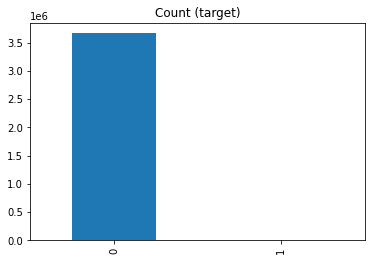

In [12]:
target1_df01 = target1_df.sample(n=3666) # 0.1퍼센트
df_01=pd.concat([target0_df,target1_df01],axis=0)
df_01.target.value_counts().plot(kind='bar', title='Count (target)')
print(df_01.target.value_counts(normalize=True)*100)

In [14]:
X01 = df_01.drop(columns=['target'])
y01 = df_01["target"]

In [ ]:
X01

,user_idx,song_idx,ssn_idx,sst_idx,st_idx,song_length,genr_idx,art_idx,com_idx,lyr_idx,lan_idx,bd,date_diff,date_diff2,city_idx,gend_idx,regi_idx,year,nat_idx,lyricists_count,composer_count,is_featured,artist_count,artist_composer,artist_composer_lyricist,song_lang_boolean,smaller_song,count_song_played,count_artist_played
12,3,12,2,1,3,280084,0,7,181,1794,0,0,847,0,0,0,2,3,0,0,1,0,0,0,0,0,0,5740,115325
18,3,18,2,1,3,265743,0,7,8,23217,0,0,847,0,0,0,2,4,0,0,1,0,0,0,0,0,0,2284,115325
24,6,24,4,1,0,292060,14,2338,308,2,2,18,711,0,3,2,1,7,3,0,2,0,0,0,0,0,0,6,715
25,6,25,4,1,0,131239,14,1693,308,2,2,18,711,0,3,2,1,11,3,0,2,0,0,0,0,0,1,1,1768
26,6,26,4,1,0,307200,0,90069,2,2,2,18,711,0,3,2,1,19,2,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6327583,5125,43521,1,1,2,199819,0,5703,52937,23231,2,0,615,0,0,0,1,2,2,2,3,0,0,0,0,0,1,54,1963
1155835,2126,123869,5,1,4,244193,7,923,3281,2,2,29,813,0,19,2,3,18,3,0,3,0,0,0,0,0,1,2,647
7295126,7471,1281,1,1,1,263105,4,58,48,16,0,0,656,0,0,0,0,7,0,0,1,0,0,0,0,0,0,1127,186776
2253772,1768,24977,1,1,1,220709,7,6921,2,2,2,19,908,0,4,1,2,4,2,0,1,0,0,0,0,0,1,56,358


In [ ]:
y01

12         0
18         0
24         0
25         0
26         0
          ..
6327583    1
1155835    1
7295126    1
2253772    1
5780427    1
Name: target, Length: 3666428, dtype: int64

In [15]:
X01_train, X01_test, y01_train, y01_test = train_test_split(X01,y01, test_size = 0.2, random_state = 0)

In [ ]:
X01_train

,user_idx,song_idx,ssn_idx,sst_idx,st_idx,song_length,genr_idx,art_idx,com_idx,lyr_idx,lan_idx,bd,date_diff,date_diff2,city_idx,gend_idx,regi_idx,year,nat_idx,lyricists_count,composer_count,is_featured,artist_count,artist_composer,artist_composer_lyricist,song_lang_boolean,smaller_song,count_song_played,count_artist_played
6969702,28493,317039,7,3,0,448888,8,5516,4812,2,2,0,783,0,0,0,0,1,3,0,2,0,0,0,0,0,0,1153,1248
5521470,2970,22822,9,5,7,273031,0,6796,748,3077,0,20,1340,0,11,2,0,12,0,0,1,0,0,0,0,0,0,331,7638
1719384,510,142866,11,1,0,204042,15,6862,2,2,2,52,1993,72,4,2,2,17,5,0,1,0,0,0,0,0,1,12,119
3462743,8557,3320,1,1,2,245864,0,1948,2042,268,0,0,1747,0,6,0,3,2,0,0,1,0,0,0,0,0,0,1236,2909
886316,16637,6207,1,1,2,222768,0,1938,35764,16308,0,38,795,0,0,1,3,1,0,0,2,0,0,0,0,0,1,353,5197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4971632,19114,323,4,3,0,298945,0,11646,12803,6022,0,0,642,0,0,0,0,1,0,0,1,0,0,0,0,0,0,7268,12727
2548081,9163,194008,6,3,0,202752,4,1242,32570,511,0,0,816,0,3,0,2,1,0,0,2,0,0,0,0,0,1,3094,45762
4910088,25949,134204,4,3,0,217663,0,3174,5863,6406,6,0,1658,0,0,0,2,17,5,0,1,0,0,0,0,0,1,201,833
3593004,466,4718,1,1,2,268078,0,1255,100170,40296,2,20,596,0,15,1,1,4,2,1,2,0,0,0,0,0,0,633,14709


In [ ]:
y01_train

6969702    0
5521470    0
1719384    0
3462743    0
886316     0
          ..
4971632    0
2548081    0
4910088    0
3593004    0
992699     0
Name: target, Length: 2933142, dtype: int64

In [ ]:
#Training with imbalance data
RF = RandomForestClassifier(random_state=0,n_jobs=-1)
RF.fit(X01_train, y01_train)
pred_01 = pd.DataFrame(RF.predict(X01_test))
pred_01

,0
0,0
1,0
2,0
3,0
4,0
...,...
733281,0
733282,0
733283,0
733284,0


In [ ]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_01=pd.DataFrame(RF.predict_proba(X01_test)[:, 1])
pred_proba_01

,0
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
733281,0.00
733282,0.00
733283,0.00
733284,0.06


In [ ]:
#imbalance data with Accuracy
print("accuracy:", accuracy_score(y01_test, pred_01))
#imbalance data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y01_test,pred_proba_01))
#imbalance data with Recall
print("recall:",recall_score(y01_test, pred_01))
#imbalance data with Precision
print("precision:",precision_score(y01_test, pred_01))
#imbalance data with F1-score
print("f1-score:",f1_score(y01_test, pred_01))

accuracy: 0.9990167547178045
roc-auc-score: 0.533448602621167
recall: 0.0
precision: 0.0
f1-score: 0.0


## oversampling

In [ ]:
print('Original dataset shape %s' % Counter(y01))
#Original dataset shape Counter({0: 3662762, 1: 36998})
ros = RandomOverSampler(random_state=0)

X01_res, y01_res = ros.fit_resample(X01_train, y01_train)
print('Resampled dataset shape %s' % Counter(y01_res))
#Resampled dataset shape Counter({0: 2930203, 1: 2930203})

Original dataset shape Counter({0: 3662762, 1: 3666})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({0: 2930196, 1: 2930196})


In [ ]:
#Training with imbalance data
RF = RandomForestClassifier(random_state=0,n_jobs=-1)
RF.fit(X01_res, y01_res)

pred_01 = pd.DataFrame(RF.predict(X01_test))
pred_01

,0
0,0
1,0
2,0
3,0
4,0
...,...
733281,0
733282,0
733283,0
733284,0


In [ ]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_01 = pd.DataFrame(RF.predict_proba(X01_test)[:, 1])
pred_proba_01

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
733281,0.0
733282,0.0
733283,0.0
733284,0.0


In [ ]:
#imbalance data with Accuracy
print("accuracy:", accuracy_score(y01_test, pred_01))
#imbalance data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y01_test,pred_proba_01))
#imbalance data with Recall
print("recall:",recall_score(y01_test, pred_01))
#imbalance data with Precision
print("precision:",precision_score(y01_test, pred_01))
#imbalance data with F1-score
print("f1-score:",f1_score(y01_test, pred_01))

accuracy: 0.9989990263007885
roc-auc-score: 0.5294106094194925
recall: 0.0
precision: 0.0
f1-score: 0.0


## smote

In [17]:
#Oversampling the data
#Training with oversampled data
RF = RandomForestClassifier(random_state=0,n_jobs=-1)

X01_sm, y01_sm = SMOTE(random_state=0,k_neighbors=5,n_jobs=-1).fit_resample(X01_train, y01_train)

RF.fit(X01_sm, y01_sm)
pred_sm_01=pd.DataFrame(RF.predict(X01_test))
pred_sm_01

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,0
0,0
1,0
2,0
3,0
4,0
...,...
733281,0
733282,0
733283,0
733284,0


In [19]:
y01_train.value_counts()

0    2930196
1       2946
Name: target, dtype: int64

In [18]:
pd.DataFrame(y01_sm).value_counts()

1    2930196
0    2930196
dtype: int64

In [ ]:
#Oversampling the data
#Training with oversampled data
RF = RandomForestClassifier(random_state=0,n_jobs=-1)

X01_sm, y01_sm = SMOTE(random_state=0,k_neighbors=5,n_jobs=-1).fit_resample(X01_train, y01_train)

RF.fit(X01_sm, y01_sm)
pred_sm_01=pd.DataFrame(RF.predict(X01_test))
pred_sm_01

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,0
0,0
1,0
2,0
3,0
4,0
...,...
733281,0
733282,0
733283,0
733284,0


In [22]:
pd.DataFrame(pred_sm_01).value_counts()

0    733100
1       186
dtype: int64

In [ ]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_sm_01=pd.DataFrame(RF.predict_proba(X01_test)[:, 1])
pred_proba_sm_01

,0
0,0.01
1,0.01
2,0.00
3,0.00
4,0.00
...,...
733281,0.00
733282,0.01
733283,0.01
733284,0.06


In [ ]:
#smote data with Accuracy
print("accuracy:", accuracy_score(y01_test, pred_sm_01))
#smote data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y01_test,pred_proba_sm_01))
#smote data with Recall
print("recall:",recall_score(y01_test, pred_sm_01))
#smote data with Precision
print("precision:",precision_score(y01_test, pred_sm_01))
#smote data with F1-score
print("f1-score:",f1_score(y01_test, pred_sm_01))

accuracy: 0.9988026499892266
roc-auc-score: 0.57139167418969
recall: 0.001388888888888889
precision: 0.00625
f1-score: 0.0022727272727272726


## Borderline SMOTE-1

In [20]:
oversample = BorderlineSMOTE(sampling_strategy='auto', random_state=0, 
                             k_neighbors=5, n_jobs = -1, m_neighbors=10, kind='borderline-1')
X01_Bsm, y01_Bsm = oversample.fit_resample(X01_train, y01_train)

#Training with oversampled data
RF = RandomForestClassifier(random_state=0,n_jobs=-1)
RF.fit(X01_Bsm, y01_Bsm)

pred_Bsm_01 = pd.DataFrame(RF.predict(X01_test))
pred_Bsm_01

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,0
0,0
1,0
2,0
3,0
4,0
...,...
733281,0
733282,0
733283,0
733284,0


In [21]:
pd.DataFrame(y01_Bsm).value_counts()

1    2930196
0    2930196
dtype: int64

In [23]:
pd.DataFrame(pred_Bsm_01).value_counts()

0    733281
1         5
dtype: int64

In [ ]:
oversample = BorderlineSMOTE(sampling_strategy='auto', random_state=0, 
                             k_neighbors=5, n_jobs = -1, m_neighbors=10, kind='borderline-1')
X01_Bsm, y01_Bsm = oversample.fit_resample(X01_train, y01_train)

#Training with oversampled data
RF = RandomForestClassifier(random_state=0,n_jobs=-1)
RF.fit(X01_Bsm, y01_Bsm)

pred_Bsm_01 = pd.DataFrame(RF.predict(X01_test))
pred_Bsm_01

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,0
0,0
1,0
2,0
3,0
4,0
...,...
733281,0
733282,0
733283,0
733284,0


In [ ]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_Bsm=pd.DataFrame(RF.predict_proba(X01_test)[:, 1])
pred_proba_Bsm

,0
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
733281,0.00
733282,0.00
733283,0.00
733284,0.06


In [ ]:
#imbalance data with Accuracy
print("accuracy:", accuracy_score(y01_test, pred_Bsm_01))
#imbalance data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y01_test,pred_proba_Bsm))
#imbalance data with Recall
print("recall:",recall_score(y01_test, pred_Bsm_01))
#imbalance data with Precision
print("precision:",precision_score(y01_test, pred_Bsm_01))
#imbalance data with F1-score
print("f1-score:",f1_score(y01_test, pred_Bsm_01))

accuracy: 0.9990153909934186
roc-auc-score: 0.5306169986352387
recall: 0.0
precision: 0.0
f1-score: 0.0


## Borderline SMOTE-2

In [ ]:
oversample = BorderlineSMOTE(sampling_strategy='auto', random_state=0, 
                             k_neighbors=5, n_jobs = -1, m_neighbors=10, kind='borderline-2')
X_Bsm2, y_Bsm2 = oversample.fit_resample(X01_train, y01_train)

#Training with oversampled data

RF.fit(X_Bsm2, y_Bsm2)

pred_Bsm2_01 = pd.DataFrame(RF.predict(X01_test))
pred_Bsm2_01

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,0
0,0
1,0
2,0
3,0
4,0
...,...
733281,0
733282,0
733283,0
733284,0


In [ ]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_Bsm2_01 = pd.DataFrame(RF.predict_proba(X01_test)[:, 1])
pred_proba_Bsm2_01

,0
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
733281,0.00
733282,0.00
733283,0.00
733284,0.02


In [ ]:
#imbalance data with Accuracy
print("accuracy:", accuracy_score(y01_test, pred_Bsm2_01))
#imbalance data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y01_test,pred_proba_Bsm2_01))
#imbalance data with Recall
print("recall:",recall_score(y01_test, pred_Bsm2_01))
#imbalance data with Precision
print("precision:",precision_score(y01_test, pred_Bsm2_01))
#imbalance data with F1-score
print("f1-score:",f1_score(y01_test, pred_Bsm2_01))

accuracy: 0.9990153909934186
roc-auc-score: 0.5240848075273916
recall: 0.0
precision: 0.0
f1-score: 0.0


## SMOTE + Tomek

In [ ]:
X_smtm, y_smtm = SMOTETomek(random_state=0, sampling_strategy='all').fit_resample(X01_train, y01_train)

RF.fit(X_smtm,y_smtm)

pred_smtm_01=pd.DataFrame(RF.predict(X01_test))
pred_smtm_01

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,0
0,0
1,0
2,0
3,0
4,0
...,...
733281,0
733282,0
733283,0
733284,0


In [ ]:
pred_proba_smtm_01 = pd.DataFrame(RF.predict_proba(X01_test)[:, 1])
pred_proba_smtm_01

,0
0,0.03
1,0.01
2,0.00
3,0.00
4,0.00
...,...
733281,0.00
733282,0.00
733283,0.01
733284,0.03


In [ ]:
#smote data with Accuracy
print("accuracy:", accuracy_score(y01_test, pred_smtm_01))
#smote data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y01_test,pred_proba_smtm_01))
#smote data with Recall
print("recall:",recall_score(y01_test, pred_smtm_01))
#smote data with Precision
print("precision:",precision_score(y01_test, pred_smtm_01))
#smote data with F1-score
print("f1-score:",f1_score(y01_test, pred_smtm_01))

accuracy: 0.9988135597843133
roc-auc-score: 0.5673054240543209
recall: 0.001388888888888889
precision: 0.006578947368421052
f1-score: 0.0022935779816513763


# SmoteEnn

In [ ]:
sme = SMOTEENN(random_state=0, sampling_strategy='all')
X01_sme, y01_sme = sme.fit_resample(X01_train, y01_train)

#Training with imbalance data
RF = RandomForestClassifier(random_state=0,n_jobs=-1)
RF.fit(X01_sme,y01_sme)

pred_sme_01=pd.DataFrame(RF.predict(X01_test))
pred_sme_01

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

,0
0,0
1,0
2,0
3,0
4,0
...,...
733281,0
733282,0
733283,0
733284,0


In [ ]:
pred_proba_sme_01 = pd.DataFrame(RF.predict_proba(X01_test)[:, 1])
pred_proba_sme_01

,0
0,0.04
1,0.01
2,0.00
3,0.00
4,0.00
...,...
733281,0.01
733282,0.01
733283,0.04
733284,0.06


In [ ]:
#smote data with Accuracy
print("accuracy:", accuracy_score(y01_test, pred_sme_01))
#smote data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y01_test,pred_proba_sme_01))
#smote data with Recall
print("recall:",recall_score(y01_test, pred_sme_01))
#smote data with Precision
print("precision:",precision_score(y01_test, pred_sme_01))
#smote data with F1-score
print("f1-score:",f1_score(y01_test, pred_sme_01))

accuracy: 0.9987030981090598
roc-auc-score: 0.5679522362717717
recall: 0.001388888888888889
precision: 0.004291845493562232
f1-score: 0.002098635886673662


## EasyEnsemble

In [ ]:
ee = EasyEnsembleClassifier(random_state = 0, base_estimator = RandomForestClassifier(), n_jobs = -1)

ee.fit(X01_train, y01_train)

pred_ee_01 = ee.predict(X01_test)
pred_ee_01

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_ee_01=pd.DataFrame(ee.predict_proba(X01_test)[:, 1])
pred_proba_ee_01

,0
0,0.674
1,0.402
2,0.384
3,0.560
4,0.626
...,...
733281,0.223
733282,0.502
733283,0.622
733284,0.611


In [ ]:
#imbalance data with Accuracy
print("accuracy:", accuracy_score(y01_test, pred_ee_01))
#imbalance data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y01_test,pred_proba_ee_01))
#imbalance data with Recall
print("recall:",recall_score(y01_test, pred_ee_01))
#imbalance data with Precision
print("precision:",precision_score(y01_test, pred_ee_01))
#imbalance data with F1-score
print("f1-score:",f1_score(y01_test, pred_ee_01))

accuracy: 0.6238193556129532
roc-auc-score: 0.671186903106493
recall: 0.6513888888888889
precision: 0.001698869111009686
f1-score: 0.003388899727587378


# 1%

In [ ]:
target0_df.shape[0]/99

36997.59595959596

0    98.999989
1     1.000011
Name: target, dtype: float64


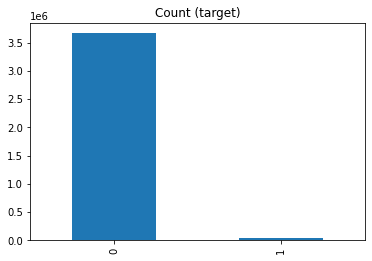

In [24]:
target1_df1 = target1_df.sample(n=36998) # 1퍼센트
df_1=pd.concat([target0_df,target1_df1],axis=0)
df_1.target.value_counts().plot(kind='bar', title='Count (target)')
print(df_1.target.value_counts(normalize=True)*100)

In [ ]:
df_1

,target,user_idx,song_idx,ssn_idx,sst_idx,st_idx,song_length,genr_idx,art_idx,com_idx,lyr_idx,lan_idx,bd,date_diff,date_diff2,city_idx,gend_idx,regi_idx,year,nat_idx,lyricists_count,composer_count,is_featured,artist_count,artist_composer,artist_composer_lyricist,song_lang_boolean,smaller_song,count_song_played,count_artist_played
12,0,3,12,2,1,3,280084,0,7,181,1794,0,0,847,0,0,0,2,3,0,0,1,0,0,0,0,0,0,5740,115325
18,0,3,18,2,1,3,265743,0,7,8,23217,0,0,847,0,0,0,2,4,0,0,1,0,0,0,0,0,0,2284,115325
24,0,6,24,4,1,0,292060,14,2338,308,2,2,18,711,0,3,2,1,7,3,0,2,0,0,0,0,0,0,6,715
25,0,6,25,4,1,0,131239,14,1693,308,2,2,18,711,0,3,2,1,11,3,0,2,0,0,0,0,0,1,1,1768
26,0,6,26,4,1,0,307200,0,90069,2,2,2,18,711,0,3,2,1,19,2,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5865847,1,26580,3760,11,2,8,240822,1,1,69546,9219,1,20,879,0,18,1,3,1,0,1,2,0,0,0,0,0,1,2508,10681
5319062,1,9527,257521,17,3,0,300192,4,9142,34173,15679,0,27,3334,91,9,1,2,1,0,0,1,0,0,0,0,0,0,579,626
6733788,1,2122,271105,8,3,0,258298,4,137,14133,2,0,31,641,0,10,2,3,1,0,0,1,0,0,0,0,0,0,4900,47177
3209952,1,4764,4574,1,1,2,267865,4,861,87422,2,0,0,1534,0,1,0,3,2,0,0,2,0,0,0,0,0,0,1074,17212


In [25]:
X1 = df_1.drop(columns=['target'])
y1 = df_1["target"]

In [26]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.2, random_state = 0)

In [ ]:
#Training with imbalance data
RF = RandomForestClassifier(random_state=0,n_jobs=-1)
RF.fit(X1_train,y1_train)
pred = pd.DataFrame(RF.predict(X1_test))
pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
739947,0
739948,0
739949,0
739950,0


In [ ]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba=pd.DataFrame(RF.predict_proba(X1_test)[:, 1])
pred_proba

,0
0,0.02
1,0.02
2,0.01
3,0.01
4,0.03
...,...
739947,0.00
739948,0.00
739949,0.00
739950,0.01


In [ ]:
#imbalance data with Accuracy
print("accuracy:", accuracy_score(y1_test, pred))
#imbalance data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y1_test,pred_proba))
#imbalance data with Recall
print("recall:",recall_score(y1_test, pred))
#imbalance data with Precision
print("precision:",precision_score(y1_test, pred))
#imbalance data with F1-score
print("f1-score:",f1_score(y1_test, pred))

accuracy: 0.9899506995048327
roc-auc-score: 0.6171140046033166
recall: 0.00013526308670363857
precision: 0.022222222222222223
f1-score: 0.00026888948642108095


## oversampling

In [ ]:
print('Original dataset shape %s' % Counter(y1))
#Original dataset shape Counter({0: 3662762, 1: 36998})
ros = RandomOverSampler(random_state=42)

X1_res, y1_res = ros.fit_resample(X1_train, y1_train)
print('Resampled dataset shape %s' % Counter(y1_res))
#Resampled dataset shape Counter({0: 2930203, 1: 2930203})

Original dataset shape Counter({0: 3662762, 1: 36998})
Resampled dataset shape Counter({0: 2930203, 1: 2930203})


In [ ]:
#Training with imbalance data
RF = RandomForestClassifier(random_state=0,n_jobs=-1)
RF.fit(X1_res,y1_res)

pred = pd.DataFrame(RF.predict(X1_test))
pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
739947,0
739948,0
739949,0
739950,0


In [ ]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba=pd.DataFrame(RF.predict_proba(X1_test)[:, 1])
pred_proba

,0
0,0.00
1,0.07
2,0.01
3,0.01
4,0.05
...,...
739947,0.01
739948,0.01
739949,0.00
739950,0.00


In [ ]:
#imbalance data with Accuracy
print("accuracy:", accuracy_score(y1_test, pred))
#imbalance data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y1_test,pred_proba))
#imbalance data with Recall
print("recall:",recall_score(y1_test, pred))
#imbalance data with Precision
print("precision:",precision_score(y1_test, pred))
#imbalance data with F1-score
print("f1-score:",f1_score(y1_test, pred))

accuracy: 0.9896168940688045
roc-auc-score: 0.6250177021808822
recall: 0.0014878939537400244
precision: 0.035256410256410256
f1-score: 0.002855288773523686


## SMOTE

In [27]:
#importing SMOTE
from imblearn.over_sampling import *
#Oversampling the data
#Training with oversampled data
RF = RandomForestClassifier(random_state=0,n_jobs=-1)

X_sm, y_sm = SMOTE(random_state=0,k_neighbors=5,n_jobs=-1).fit_resample(X1_train, y1_train)

RF.fit(X_sm,y_sm)
pred_sm=pd.DataFrame(RF.predict(X1_test))
pred_sm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,0
0,0
1,0
2,0
3,0
4,0
...,...
739947,0
739948,0
739949,0
739950,0


In [29]:
pd.DataFrame(y_sm).value_counts()

1    2930203
0    2930203
dtype: int64

In [ ]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba=pd.DataFrame(RF.predict_proba(X1_test)[:, 1])
pred_proba

,0
0,0.06
1,0.07
2,0.12
3,0.00
4,0.10
...,...
739947,0.07
739948,0.01
739949,0.00
739950,0.02


In [ ]:
#smote data with Accuracy
print("accuracy:", accuracy_score(y1_test, pred_sm))
#smote data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y1_test,pred_proba))
#smote data with Recall
print("recall:",recall_score(y1_test, pred_sm))
#smote data with Precision
print("precision:",precision_score(y1_test, pred_sm))
#smote data with F1-score
print("f1-score:",f1_score(y1_test, pred_sm))

accuracy: 0.9847733366488637
roc-auc-score: 0.6544201972103376
recall: 0.02096577843906398
precision: 0.03704588910133843
f1-score: 0.026777230716074976


## Borderline SMOTE-1

In [ ]:
oversample = BorderlineSMOTE(sampling_strategy='auto', random_state=0, 
                             k_neighbors=5, n_jobs = -1, m_neighbors=10, kind='borderline-1')
X_Bsm, y_Bsm = oversample.fit_resample(X1_train, y1_train)

#Training with oversampled data
RF = RandomForestClassifier(random_state=0,n_jobs=-1)
RF.fit(X_Bsm, y_Bsm)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [ ]:
pred = pd.DataFrame(RF.predict(X1_test))
pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
739947,0
739948,0
739949,0
739950,0


In [ ]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba=pd.DataFrame(RF.predict_proba(X1_test)[:, 1])
pred_proba

,0
0,0.02
1,0.03
2,0.03
3,0.01
4,0.00
...,...
739947,0.02
739948,0.00
739949,0.00
739950,0.00


In [ ]:
#imbalance data with Accuracy
print("accuracy:", accuracy_score(y1_test, pred))
#imbalance data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y1_test,pred_proba))
#imbalance data with Recall
print("recall:",recall_score(y1_test, pred))
#imbalance data with Precision
print("precision:",precision_score(y1_test, pred))
#imbalance data with F1-score
print("f1-score:",f1_score(y1_test, pred))

accuracy: 0.9888817112461349
roc-auc-score: 0.635320692689749
recall: 0.0045989449479237115
precision: 0.037694013303769404
f1-score: 0.008197709463532248


## Borderline SMOTE-2

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

oversample = BorderlineSMOTE(sampling_strategy='auto', random_state=0, 
                             k_neighbors=5, n_jobs = -1, m_neighbors=10, kind='borderline-2')
X_Bsm2, y_Bsm2 = oversample.fit_resample(X1_train, y1_train)

#Training with oversampled data

RF.fit(X_Bsm2, y_Bsm2)

pred = pd.DataFrame(RF.predict(X1_test))
pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
739947,0
739948,0
739949,0
739950,0


In [ ]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba=pd.DataFrame(RF.predict_proba(X1_test)[:, 1])
pred_proba

,0
0,0.01
1,0.24
2,0.10
3,0.04
4,0.35
...,...
739947,0.00
739948,0.01
739949,0.00
739950,0.02


In [ ]:
print(confusion_matrix(y1_test, pred))

[[731517   1042]
 [  7361     32]]


In [ ]:
#imbalance data with Accuracy
print("accuracy:", accuracy_score(y1_test, pred))
#imbalance data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y1_test,pred_proba))
#imbalance data with Recall
print("recall:",recall_score(y1_test, pred))
#imbalance data with Precision
print("precision:",precision_score(y1_test, pred))
#imbalance data with F1-score
print("f1-score:",f1_score(y1_test, pred))

accuracy: 0.9886438579799771
roc-auc-score: 0.6351407321231323
recall: 0.004328418774516434
precision: 0.0297951582867784
f1-score: 0.007558757529231132


# SMOTE + Tomek

In [ ]:
X_smtm, y_smtm = SMOTETomek(random_state = 0, sampling_strategy='all').fit_resample(X1_train, y1_train)

#Training with imbalance data
RF = RandomForestClassifier(random_state=0,n_jobs=-1)
RF.fit(X_smtm,y_smtm)

pred_smtm_1=pd.DataFrame(RF.predict(X1_test))
pred_smtm_1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,0
0,0
1,0
2,0
3,0
4,0
...,...
739947,0
739948,0
739949,0
739950,0


In [ ]:
pred_proba_smtm_1 = pd.DataFrame(RF.predict_proba(X1_test)[:, 1])
pred_proba_smtm_1

,0
0,0.19
1,0.30
2,0.18
3,0.01
4,0.19
...,...
739947,0.05
739948,0.00
739949,0.00
739950,0.01


In [ ]:
#smote data with Accuracy
print("accuracy:", accuracy_score(y1_test, pred_smtm_1))
#smote data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y1_test,pred_proba_smtm_1))
#smote data with Recall
print("recall:",recall_score(y1_test, pred_smtm_1))
#smote data with Precision
print("precision:",precision_score(y1_test, pred_smtm_1))
#smote data with F1-score
print("f1-score:",f1_score(y1_test, pred_smtm_1))

accuracy: 0.9845219689925833
roc-auc-score: 0.6503431896430281
recall: 0.02164209387258217
precision: 0.0365296803652968
f1-score: 0.027180837509555758


# smote + enn

In [ ]:
sme = SMOTEENN(random_state=0, sampling_strategy='all')
X1_sme, y1_sme = sme.fit_resample(X1_train, y1_train)

#Training with imbalance data
RF = RandomForestClassifier(random_state=0,n_jobs=-1)
RF.fit(X1_sme,y1_sme)

pred_sme_1=pd.DataFrame(RF.predict(X1_test))
pred_sme_1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

,0
0,0
1,0
2,0
3,0
4,0
...,...
739947,0
739948,0
739949,0
739950,0


In [ ]:
pred_proba_sme_1 = pd.DataFrame(RF.predict_proba(X1_test)[:, 1])
pred_proba_sme_1

,0
0,0.15
1,0.24
2,0.16
3,0.02
4,0.22
...,...
739947,0.06
739948,0.00
739949,0.00
739950,0.02


In [ ]:
#smote data with Accuracy
print("accuracy:", accuracy_score(y1_test, pred_sme_1))
#smote data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y1_test,pred_proba_sme_1))
#smote data with Recall
print("recall:",recall_score(y1_test, pred_sme_1))
#smote data with Precision
print("precision:",precision_score(y1_test, pred_sme_1))
#smote data with F1-score
print("f1-score:",f1_score(y1_test, pred_sme_1))

accuracy: 0.981031202023915
roc-auc-score: 0.654923436090718
recall: 0.031786825375355064
precision: 0.03303809925488542
f1-score: 0.0324003860471529


## EasyEnsemble

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier

ee = EasyEnsembleClassifier(random_state = 0, base_estimator = RandomForestClassifier(), n_jobs = -1)

ee.fit(X1_train, y1_train)

pred_ee = ee.predict(X1_test)
pred_ee

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [ ]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_ee=pd.DataFrame(ee.predict_proba(X1_test)[:, 1])
pred_proba_ee

,0
0,0.523
1,0.535
2,0.576
3,0.430
4,0.699
...,...
739947,0.353
739948,0.310
739949,0.369
739950,0.344


In [ ]:
#imbalance data with Accuracy
print("accuracy:", accuracy_score(y1_test, pred_ee))
#imbalance data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y1_test,pred_proba_ee))
#imbalance data with Recall
print("recall:",recall_score(y1_test, pred_ee))
#imbalance data with Precision
print("precision:",precision_score(y1_test, pred_ee))
#imbalance data with F1-score
print("f1-score:",f1_score(y1_test, pred_ee))

accuracy: 0.6241404847882025
roc-auc-score: 0.6985314958744591
recall: 0.6749628026511565
precision: 0.0177766694572594
f1-score: 0.034640990218606164


# 점수

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from matplotlib import font_manager, rc  #한글 폰트를 설정하기 위함.
%matplotlib inline

# 한글 폰트 설정
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
    
rc('axes', unicode_minus=False)

# 오버샘플링 점수 시각화

In [ ]:
model_list = ["before", "ROS", "SM", "SM1", "SM2"]
accuracy_list = [0.9899506995048327, 0.9896168940688045, 0.9847733366488637, 0.9888817112461349, 0.9886438579799771]
rocauc_list = [0.6171140046033166, 0.6250177021808822, 0.6544201972103376, 0.635320692689749, 0.6351407321231323]
recall_list = [0.00013526308670363857, 0.0014878939537400244, 0.02096577843906398, 0.0045989449479237115, 0.004328418774516434]
precision_list = [0.022222222222222223, 0.035256410256410256, 0.03704588910133843, 0.037694013303769404, 0.0297951582867784]
f1_list = [0.00026888948642108095, 0.002855288773523686, 0.026777230716074976, 0.008197709463532248, 0.007558757529231132]
score_1 = pd.DataFrame({"model_1" : model_list, "accuracy" : accuracy_list, "roc_auc" : rocauc_list, "recall" : recall_list, "precision" : precision_list, "f1_score" : f1_list})
score_1

,model_1,accuracy,roc_auc,recall,precision,f1_score
0,before,0.989951,0.617114,0.000135,0.022222,0.000269
1,ROS,0.989617,0.625018,0.001488,0.035256,0.002855
2,SM,0.984773,0.654420,0.020966,0.037046,0.026777
3,SM1,0.988882,0.635321,0.004599,0.037694,0.008198
4,SM2,0.988644,0.635141,0.004328,0.029795,0.007559


In [ ]:
model_list = ["before", "ROS", "SM", "SM1", "SM2"]
accuracy_list = [0.9990167547178045, 0.9989990263007885, 0.9988026499892266, 0.9990153909934186, 0.9990153909934186]
rocauc_list = [0.533448602621167, 0.5294106094194925, 0.57139167418969, 0.5306169986352387, 0.5240848075273916]
recall_list = [0.0, 0.0, 0.001388888888888889, 0.0, 0.0]
precision_list = [0.0, 0.0, 0.00625, 0.0, 0.0]
f1_list = [0.0, 0.0, 0.0022727272727272726, 0.0, 0.0]
score_01 = pd.DataFrame({"model_01" : model_list, "accuracy" : accuracy_list, "roc_auc" : rocauc_list, "recall" : recall_list, "precision" : precision_list, "f1_score" : f1_list})
score_01

,model_01,accuracy,roc_auc,recall,precision,f1_score
0,before,0.999017,0.533449,0.000000,0.00000,0.000000
1,ROS,0.998999,0.529411,0.000000,0.00000,0.000000
2,SM,0.998803,0.571392,0.001389,0.00625,0.002273
3,SM1,0.999015,0.530617,0.000000,0.00000,0.000000
4,SM2,0.999015,0.524085,0.000000,0.00000,0.000000


In [ ]:
model_list = ["before", "ROS", "SM", "SM1", "SM2"]
accuracy_list = [0.899014433354465, 0.8922511020360023, 0.8815759729122745, 0.882755409436475, 0.8816619734921641]
rocauc_list = [0.7189822943188334, 0.7217030098672353, 0.728387006990153, 0.7243226741097004, 0.717803750251921]
recall_list = [0.029495612681879328, 0.07440545977366128, 0.1812807760184625, 0.15837539646299473, 0.1539078601488356]
precision_list = [0.40181573638197715, 0.3218728311355507, 0.32831917746982564, 0.3202805231107118, 0.3099617239150967]
f1_list = [0.05495705761293216, 0.12087008821170811, 0.23358697294245798, 0.21194579551929443, 0.20568516365255682]
score_10 = pd.DataFrame({"model_10" : model_list, "accuracy" : accuracy_list, "roc_auc" : rocauc_list, "recall" : recall_list, "precision" : precision_list, "f1_score" : f1_list})
score_10

,model_10,accuracy,roc_auc,recall,precision,f1_score
0,before,0.899014,0.718982,0.029496,0.401816,0.054957
1,ROS,0.892251,0.721703,0.074405,0.321873,0.120870
2,SM,0.881576,0.728387,0.181281,0.328319,0.233587
3,SM1,0.882755,0.724323,0.158375,0.320281,0.211946
4,SM2,0.881662,0.717804,0.153908,0.309962,0.205685


In [7]:
model_list = ["before", "ROS", "SM", "SM1", "SM2"]
accuracy_list = [0, -0.006763331318462629, -0.01743846044219044, -0.016259023917989945, -0.01735245986230083]
rocauc_list = [0, 0.0027207155484019196, 0.009404712671319593, 0.005340379790866989, -0.0011785440669124236]
recall_list = [0, 0.04490984709178195, 0.15178516333658318, 0.1288797837811154, 0.12441224746695626]
precision_list = [0, -0.07994290524642644, -0.07349655891215151, -0.08153521327126534, -0.09185401246688046]
f1_list = [0, 0.06591303059877596, 0.17862991532952582, 0.15698873790636228, 0.15072810603962467]
compare_score_10 = pd.DataFrame({"compare_model_10" : model_list, "accuracy" : accuracy_list, "roc_auc" : rocauc_list, "recall" : recall_list, "precision" : precision_list, "f1_score" : f1_list})
compare_score_10

,compare_model_10,accuracy,roc_auc,recall,precision,f1_score
0,before,0.000000,0.000000,0.000000,0.000000,0.000000
1,ROS,-0.006763,0.002721,0.044910,-0.079943,0.065913
2,SM,-0.017438,0.009405,0.151785,-0.073497,0.178630
3,SM1,-0.016259,0.005340,0.128880,-0.081535,0.156989
4,SM2,-0.017352,-0.001179,0.124412,-0.091854,0.150728


In [9]:
model_list = [ "ROS", "SM", "SM1", "SM2"]
accuracy_list = [ -0.00033380543602823387, -0.0051773628559690366, -0.0010689882586978339, -0.0013068415248556065]
rocauc_list = [ 0.007903697577565594, 0.03730619260702106, 0.018206688086432443, 0.01802672751981571]
recall_list = [ 0.001352630867036386, 0.020830515352360343, 0.004463681861220073, 0.004193155687812796]
precision_list = [0.013034188034188033, 0.014823666879116206, 0.01547179108154718, 0.007572936064556175]
f1_list = [0.0025863992871026052, 0.026508341229653894, 0.007928819977111166, 0.007289868042810051]
compare_score_1 = pd.DataFrame({"compare_model_1" : model_list, "accuracy" : accuracy_list, "roc_auc" : rocauc_list, "recall" : recall_list, "precision" : precision_list, "f1_score" : f1_list})
compare_score_1

,compare_model_1,accuracy,roc_auc,recall,precision,f1_score
0,ROS,-0.000334,0.007904,0.001353,0.013034,0.002586
1,SM,-0.005177,0.037306,0.020831,0.014824,0.026508
2,SM1,-0.001069,0.018207,0.004464,0.015472,0.007929
3,SM2,-0.001307,0.018027,0.004193,0.007573,0.007290


In [12]:
model_list = [ "ROS", "SM", "SM1", "SM2"]
accuracy_list = [ -1.7728417015971942e-05, -0.00021410472857785745, -1.363724385861076e-06, -1.363724385861076e-06]
rocauc_list = [ -0.004037993201674528, 0.037943071568522946, -0.0028316039859282993, -0.009363795093775384]
recall_list = [ 0.0, 0.001388888888888889, 0.0, 0.0]
precision_list = [0.0, 0.00625, 0.0, 0.0]
f1_list = [0.0, 0.0022727272727272726, 0.0, 0.0]
compare_score_01 = pd.DataFrame({"compare_model_1" : model_list, "accuracy" : accuracy_list, "roc_auc" : rocauc_list, "recall" : recall_list, "precision" : precision_list, "f1_score" : f1_list})
compare_score_01

,compare_model_1,accuracy,roc_auc,recall,precision,f1_score
0,ROS,-0.000018,-0.004038,0.000000,0.00000,0.000000
1,SM,-0.000214,0.037943,0.001389,0.00625,0.002273
2,SM1,-0.000001,-0.002832,0.000000,0.00000,0.000000
3,SM2,-0.000001,-0.009364,0.000000,0.00000,0.000000


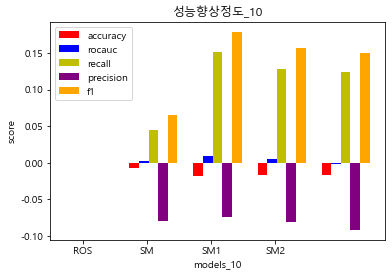

In [8]:
X = np.arange(len(model_list))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side

plt.bar(X , accuracy_list, color = 'r', width = 0.15)
plt.bar(X + 0.15, rocauc_list, color = 'b', width = 0.15)
plt.bar(X + 0.3, recall_list, color = 'y', width = 0.15)
plt.bar(X + 0.45, precision_list, color = 'purple', width = 0.15)
plt.bar(X + 0.6, f1_list, color = 'orange', width = 0.15)

# Creating the legend of the bars in the plot
plt.legend(['accuracy', 'rocauc', 'recall', 'precision', 'f1'])

# Overiding the x axis with the country names
plt.xticks([i + 0.2 for i in range(4)], ["ROS", "SM", "SM1", "SM2"])
# Giving the tilte for the plot
plt.title("성능향상정도_10")
# Namimg the x and y axis
plt.xlabel('models_10')
plt.ylabel('score')

# Displaying the bar plot
plt.show()

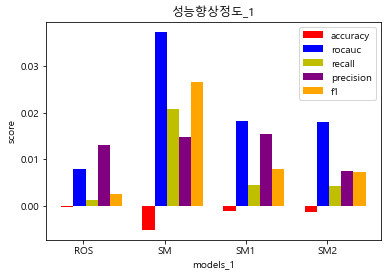

In [10]:
X = np.arange(len(model_list))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side

plt.bar(X , accuracy_list, color = 'r', width = 0.15)
plt.bar(X + 0.15, rocauc_list, color = 'b', width = 0.15)
plt.bar(X + 0.3, recall_list, color = 'y', width = 0.15)
plt.bar(X + 0.45, precision_list, color = 'purple', width = 0.15)
plt.bar(X + 0.6, f1_list, color = 'orange', width = 0.15)

# Creating the legend of the bars in the plot
plt.legend(['accuracy', 'rocauc', 'recall', 'precision', 'f1'])

# Overiding the x axis with the country names
plt.xticks([i + 0.2 for i in range(4)], ["ROS", "SM", "SM1", "SM2"])
# Giving the tilte for the plot
plt.title("성능향상정도_1")
# Namimg the x and y axis
plt.xlabel('models_1')
plt.ylabel('score')

# Displaying the bar plot
plt.show()

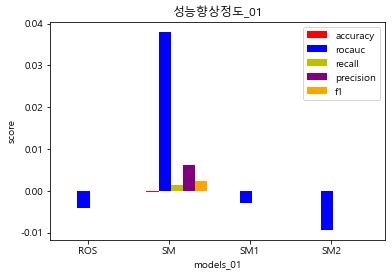

In [13]:
X = np.arange(len(model_list))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side

plt.bar(X , accuracy_list, color = 'r', width = 0.15)
plt.bar(X + 0.15, rocauc_list, color = 'b', width = 0.15)
plt.bar(X + 0.3, recall_list, color = 'y', width = 0.15)
plt.bar(X + 0.45, precision_list, color = 'purple', width = 0.15)
plt.bar(X + 0.6, f1_list, color = 'orange', width = 0.15)

# Creating the legend of the bars in the plot
plt.legend(['accuracy', 'rocauc', 'recall', 'precision', 'f1'])

# Overiding the x axis with the country names
plt.xticks([i + 0.2 for i in range(4)], ["ROS", "SM", "SM1", "SM2"])
# Giving the tilte for the plot
plt.title("성능향상정도_01")
# Namimg the x and y axis
plt.xlabel('models_01')
plt.ylabel('score')

# Displaying the bar plot
plt.show()

In [14]:
model_list = ["before", "SMTM", "SMENN"]
accuracy_list = [0.899014433354465, 0.8787146107613755, 0.8439138618191826]
rocauc_list = [0.7189822943188334, 0.7271127562262706, 0.7168929026558201]
recall_list = [0.029495612681879328, 0.18953707931728148, 0.28492268200273974]
precision_list = [0.40181573638197715, 0.31726816369533334, 0.25042574654792765]
f1_list = [0.05495705761293216, 0.23730646806143577, 0.2665627525689874]
score_10 = pd.DataFrame({"combine_10" : model_list, "accuracy" : accuracy_list, "roc_auc" : rocauc_list, "recall" : recall_list, "precision" : precision_list, "f1_score" : f1_list})
score_10

,combine_10,accuracy,roc_auc,recall,precision,f1_score
0,before,0.899014,0.718982,0.029496,0.401816,0.054957
1,SMTM,0.878715,0.727113,0.189537,0.317268,0.237306
2,SMENN,0.843914,0.716893,0.284923,0.250426,0.266563


In [15]:
model_list = ["before", "SMTM", "SMENN"]
accuracy_list = [0.9899506995048327, 0.9845219689925833, 0.981031202023915]
rocauc_list = [0.6171140046033166, 0.6503431896430281, 0.654923436090718]
recall_list = [0.00013526308670363857, 0.02164209387258217, 0.031786825375355064]
precision_list = [0.022222222222222223, 0.0365296803652968, 0.03303809925488542]
f1_list = [0.00026888948642108095, 0.027180837509555758, 0.0324003860471529]
score_1 = pd.DataFrame({"combine_1" : model_list, "accuracy" : accuracy_list, "roc_auc" : rocauc_list, "recall" : recall_list, "precision" : precision_list, "f1_score" : f1_list})
score_1

,combine_1,accuracy,roc_auc,recall,precision,f1_score
0,before,0.989951,0.617114,0.000135,0.022222,0.000269
1,SMTM,0.984522,0.650343,0.021642,0.036530,0.027181
2,SMENN,0.981031,0.654923,0.031787,0.033038,0.032400


In [16]:
model_list = ["before", "SMTM", "SMENN"]
accuracy_list = [0.9990167547178045, 0.9988135597843133, 0.9987030981090598]
rocauc_list = [0.533448602621167, 0.5673054240543209, 0.5679522362717717]
recall_list = [0.0, 0.001388888888888889, 0.001388888888888889]
precision_list = [0.0, 0.006578947368421052, 0.004291845493562232]
f1_list = [0.0, 0.0022935779816513763, 0.002098635886673662]
score_01 = pd.DataFrame({"combine_01" : model_list, "accuracy" : accuracy_list, "roc_auc" : rocauc_list, "recall" : recall_list, "precision" : precision_list, "f1_score" : f1_list})
score_01

,combine_01,accuracy,roc_auc,recall,precision,f1_score
0,before,0.999017,0.533449,0.000000,0.000000,0.000000
1,SMTM,0.998814,0.567305,0.001389,0.006579,0.002294
2,SMENN,0.998703,0.567952,0.001389,0.004292,0.002099


# 언더샘플링 점수 시각화

In [4]:
model_list = ["before", "RUS", "Nearmiss1", "Nearmiss3", "ENN", "RENN", "Tomek"]
accuracy_list = [ 0.8991225483691833,0.6499235823418695,0.24215183279521543,0.5622054480138781,0.8899868296254798,0.8715556767754206,0.8981765419903974]
rocauc_list = [0.7190554899041941,0.7090333512857501,0.4410827848769122,0.6562965106297525,0.7144102698503361,0.7080077405025138,0.7192740865898356]
recall_list = [0.030618667390687283,0.6643053721507115,0.7388342445297362,0.6775598859667527,0.08809191770847474,0.16009083167754753,0.03711017043280801]
precision_list = [0.41062562065541214,0.17276319041245816,0.09132275907095373,0.1425592741945954,0.3131800631800632,0.262261938457806,0.38237538148524924]
f1_list = [0.05698797533047742,0.27421293937850233,0.16255330356524653,0.2355571001360089,0.13750589957715684,0.19881830930868793,0.06765437098534194]
score_10 = pd.DataFrame({"model_10" : model_list, "accuracy" : accuracy_list, "roc_auc" : rocauc_list, "recall" : recall_list, "precision" : precision_list, "f1_score" : f1_list})
score_10

,model_10,accuracy,roc_auc,recall,precision,f1_score
0,before,0.899123,0.719055,0.030619,0.410626,0.056988
1,RUS,0.649924,0.709033,0.664305,0.172763,0.274213
2,Nearmiss1,0.242152,0.441083,0.738834,0.091323,0.162553
3,Nearmiss3,0.562205,0.656297,0.677560,0.142559,0.235557
4,ENN,0.889987,0.714410,0.088092,0.313180,0.137506
5,RENN,0.871556,0.708008,0.160091,0.262262,0.198818
6,Tomek,0.898177,0.719274,0.037110,0.382375,0.067654


In [5]:
score_10 = score_10.set_index("model_10")
new10 = pd.DataFrame(columns=["accuracy improvement","rocauc improvement","recall improvement","precision improvement","f1_Score improvement"])

pd.concat([score_10,new10],axis=1)
for i in ["before","RUS","Nearmiss1","Nearmiss3","ENN","RENN","Tomek"]:
    score_10.loc[i,"accuracy improvement"] = score_10.loc[i]["accuracy"]-score_10.loc["before"]["accuracy"]
    score_10.loc[i,"rocauc improvement"] = score_10.loc[i]["roc_auc"]-score_10.loc["before"]["roc_auc"]
    score_10.loc[i,"recall improvement"] = score_10.loc[i]["recall"]-score_10.loc["before"]["recall"]
    score_10.loc[i,"precision improvement"] = score_10.loc[i]["precision"]-score_10.loc["before"]["precision"]
    score_10.loc[i,"f1_Score improvement"] = score_10.loc[i]["f1_score"]-score_10.loc["before"]["f1_score"]
display(score_10)

,accuracy,roc_auc,recall,precision,f1_score,accuracy improvement,rocauc improvement,recall improvement,precision improvement,f1_Score improvement
model_10,,,,,,,,,,
before,0.899123,0.719055,0.030619,0.410626,0.056988,0.000000,0.000000,0.000000,0.000000,0.000000
RUS,0.649924,0.709033,0.664305,0.172763,0.274213,-0.249199,-0.010022,0.633687,-0.237862,0.217225
Nearmiss1,0.242152,0.441083,0.738834,0.091323,0.162553,-0.656971,-0.277973,0.708216,-0.319303,0.105565
Nearmiss3,0.562205,0.656297,0.677560,0.142559,0.235557,-0.336917,-0.062759,0.646941,-0.268066,0.178569
ENN,0.889987,0.714410,0.088092,0.313180,0.137506,-0.009136,-0.004645,0.057473,-0.097446,0.080518
RENN,0.871556,0.708008,0.160091,0.262262,0.198818,-0.027567,-0.011048,0.129472,-0.148364,0.141830
Tomek,0.898177,0.719274,0.037110,0.382375,0.067654,-0.000946,0.000219,0.006492,-0.028250,0.010666


In [7]:
# score_10 = score_10.set_index("model_10")
new10 = pd.DataFrame(columns=["accuracy improvement","rocauc improvement","recall improvement","precision improvement","f1_Score improvement"])

pd.concat([score_10,new10],axis=1)
for i in ["before","RUS","Nearmiss1","Nearmiss3","ENN","RENN","Tomek"]:
    score_10.loc[i,"accuracy improvement"] = score_10.loc[i]["accuracy"]-score_10.loc["before"]["accuracy"]
    score_10.loc[i,"rocauc improvement"] = score_10.loc[i]["roc_auc"]-score_10.loc["before"]["roc_auc"]
    score_10.loc[i,"recall improvement"] = score_10.loc[i]["recall"]-score_10.loc["before"]["recall"]
    score_10.loc[i,"precision improvement"] = score_10.loc[i]["precision"]-score_10.loc["before"]["precision"]
    score_10.loc[i,"f1_Score improvement"] = score_10.loc[i]["f1_score"]-score_10.loc["before"]["f1_score"]
display(score_10)

,accuracy,roc_auc,recall,precision,f1_score,accuracy improvement,rocauc improvement,recall improvement,precision improvement,f1_Score improvement
model_10,,,,,,,,,,
before,0.899123,0.719055,0.030619,0.410626,0.056988,0.000000,0.000000,0.000000,0.000000,0.000000
RUS,0.649924,0.709033,0.664305,0.172763,0.274213,-0.249199,-0.010022,0.633687,-0.237862,0.217225
Nearmiss1,0.242152,0.441083,0.738834,0.091323,0.162553,-0.656971,-0.277973,0.708216,-0.319303,0.105565
Nearmiss3,0.562205,0.656297,0.677560,0.142559,0.235557,-0.336917,-0.062759,0.646941,-0.268066,0.178569
ENN,0.889987,0.714410,0.088092,0.313180,0.137506,-0.009136,-0.004645,0.057473,-0.097446,0.080518
RENN,0.871556,0.708008,0.160091,0.262262,0.198818,-0.027567,-0.011048,0.129472,-0.148364,0.141830
Tomek,0.898177,0.719274,0.037110,0.382375,0.067654,-0.000946,0.000219,0.006492,-0.028250,0.010666


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


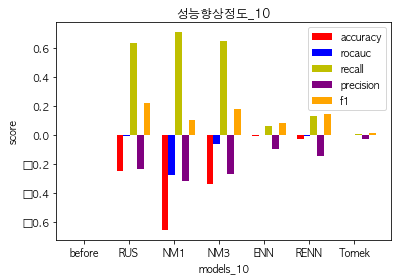

In [11]:
X = np.arange(len(model_list))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side

plt.bar(X , score_10["accuracy improvement"], color = 'r', width = 0.15)
plt.bar(X + 0.15, score_10["rocauc improvement"], color = 'b', width = 0.15)
plt.bar(X + 0.3, score_10["recall improvement"], color = 'y', width = 0.15)
plt.bar(X + 0.45, score_10["precision improvement"], color = 'purple', width = 0.15)
plt.bar(X + 0.6, score_10["f1_Score improvement"], color = 'orange', width = 0.15)

# Creating the legend of the bars in the plot
plt.legend(['accuracy', 'rocauc', 'recall', 'precision', 'f1'])

# Overiding the x axis with the country names
plt.xticks([i + 0.2 for i in range(7)], ["before", "RUS", "NM1", "NM3", "ENN", "RENN", "Tomek"])
# Giving the tilte for the plot
plt.title("성능향상정도_10")
# Namimg the x and y axis
plt.xlabel('models_10')
plt.ylabel('score')

# Displaying the bar plot
plt.show()

In [12]:
model_list = ["before", "RUS", "Nearmiss1", "Nearmiss3", "ENN", "RENN", "Tomek"]
accuracy_list = [0.9899655653339676,0.6322991221052177,0.08044440720479167,0.5216784331956668,0.9899642138949554,0.9899182649685385,0.9899561052608817]
rocauc_list = [0.6215747210717527,0.6826204142650137,0.44246284802342023,0.6430217154566931,0.6228236947506488,0.6235468245224594,0.6255590970434881]
recall_list = [0.0005410523468145543,0.6389828215879887,0.863790071689436,0.6771270120384147,0.0005410523468145543,0.0006763154335181928,0.0005410523468145543]
precision_list = [0.1,0.017232322642775848,0.009311671230639569,0.014039949068023357,0.0975609756097561,0.06493506493506493,0.0851063829787234]
f1_list = [0.001076281447598547,0.03355959776790313,0.01842472363635839,0.02750950000961679,0.0010761366693570083,0.0013386880856760374,0.001075268817204301]
score_1 = pd.DataFrame({"model_1" : model_list, "accuracy" : accuracy_list, "roc_auc" : rocauc_list, "recall" : recall_list, "precision" : precision_list, "f1_score" : f1_list})
score_1

,model_1,accuracy,roc_auc,recall,precision,f1_score
0,before,0.989966,0.621575,0.000541,0.100000,0.001076
1,RUS,0.632299,0.682620,0.638983,0.017232,0.033560
2,Nearmiss1,0.080444,0.442463,0.863790,0.009312,0.018425
3,Nearmiss3,0.521678,0.643022,0.677127,0.014040,0.027510
4,ENN,0.989964,0.622824,0.000541,0.097561,0.001076
5,RENN,0.989918,0.623547,0.000676,0.064935,0.001339
6,Tomek,0.989956,0.625559,0.000541,0.085106,0.001075


In [13]:
score_1 = score_1.set_index("model_1")
new1 = pd.DataFrame(columns=["accuracy improvement","rocauc improvement","recall improvement","precision improvement","f1_Score improvement"])
pd.concat([score_1,new1],axis=1)
for i in ["before","RUS","Nearmiss1","Nearmiss3","ENN","RENN","Tomek"]:
  score_1.loc[i,"accuracy improvement"] = score_1.loc[i]["accuracy"]-score_1.loc["before"]["accuracy"]
  score_1.loc[i,"rocauc improvement"] = score_1.loc[i]["roc_auc"]-score_1.loc["before"]["roc_auc"]
  score_1.loc[i,"recall improvement"] = score_1.loc[i]["recall"] -score_1.loc["before"]["recall"]
  score_1.loc[i,"precision improvement"] = score_1.loc[i]["precision"]-score_1.loc["before"]["precision"]
  score_1.loc[i,"f1_Score improvement"] = score_1.loc[i]["f1_score"]-score_1.loc["before"]["f1_score"]
display(score_1)

,accuracy,roc_auc,recall,precision,f1_score,accuracy improvement,rocauc improvement,recall improvement,precision improvement,f1_Score improvement
model_1,,,,,,,,,,
before,0.989966,0.621575,0.000541,0.100000,0.001076,0.000000,0.000000,0.000000,0.000000,0.000000e+00
RUS,0.632299,0.682620,0.638983,0.017232,0.033560,-0.357666,0.061046,0.638442,-0.082768,3.248332e-02
Nearmiss1,0.080444,0.442463,0.863790,0.009312,0.018425,-0.909521,-0.179112,0.863249,-0.090688,1.734844e-02
Nearmiss3,0.521678,0.643022,0.677127,0.014040,0.027510,-0.468287,0.021447,0.676586,-0.085960,2.643322e-02
ENN,0.989964,0.622824,0.000541,0.097561,0.001076,-0.000001,0.001249,0.000000,-0.002439,-1.447782e-07
RENN,0.989918,0.623547,0.000676,0.064935,0.001339,-0.000047,0.001972,0.000135,-0.035065,2.624066e-04
Tomek,0.989956,0.625559,0.000541,0.085106,0.001075,-0.000009,0.003984,0.000000,-0.014894,-1.012630e-06


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


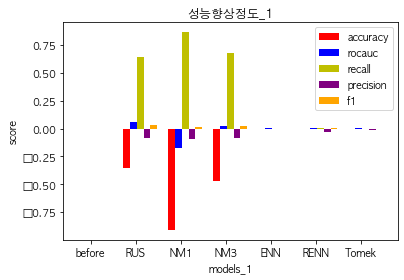

In [14]:
X = np.arange(len(model_list))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side

plt.bar(X , score_1["accuracy improvement"], color = 'r', width = 0.15)
plt.bar(X + 0.15, score_1["rocauc improvement"], color = 'b', width = 0.15)
plt.bar(X + 0.3, score_1["recall improvement"], color = 'y', width = 0.15)
plt.bar(X + 0.45, score_1["precision improvement"], color = 'purple', width = 0.15)
plt.bar(X + 0.6, score_1["f1_Score improvement"], color = 'orange', width = 0.15)

# Creating the legend of the bars in the plot
plt.legend(['accuracy', 'rocauc', 'recall', 'precision', 'f1'])

# Overiding the x axis with the country names
plt.xticks([i + 0.2 for i in range(7)], ["before", "RUS", "NM1", "NM3", "ENN", "RENN", "Tomek"])
# Giving the tilte for the plot
plt.title("성능향상정도_1")
# Namimg the x and y axis
plt.xlabel('models_1')
plt.ylabel('score')

# Displaying the bar plot
plt.show()

In [15]:
model_list = ["before", "RUS", "Nearmiss1", "Nearmiss3", "ENN", "RENN", "Tomek"]
accuracy_list = [0.9990181184421904,0.6216551250126144,0.01416500519578991,0.48004598478629074,0.9990153909934186,0.9990167547178045,0.9990153909934186]
rocauc_list = [0.5388950051371935,0.6391962076151197,0.45477358771162674,0.6022163778493071,0.5306961268867091,0.5270787565746826,0.5185864443916619]
recall_list = [0.0,0.5958333333333333,0.9736111111111111,0.6527777777777778,0.0,0.0,0.0]
precision_list = [0.0,0.0015455393716247619,0.0009687927129098194,0.0012319951768699458,0.0,0.0,0.0]
f1_list = [0.0,0.0030830815004329972,0.0019356593460453596,0.0024593487958348053,0.0,0.0,0.0]
score_01 = pd.DataFrame({"model_0.1" : model_list, "accuracy" : accuracy_list, "roc_auc" : rocauc_list, "recall" : recall_list, "precision" : precision_list, "f1_score" : f1_list})
score_01

,model_0.1,accuracy,roc_auc,recall,precision,f1_score
0,before,0.999018,0.538895,0.000000,0.000000,0.000000
1,RUS,0.621655,0.639196,0.595833,0.001546,0.003083
2,Nearmiss1,0.014165,0.454774,0.973611,0.000969,0.001936
3,Nearmiss3,0.480046,0.602216,0.652778,0.001232,0.002459
4,ENN,0.999015,0.530696,0.000000,0.000000,0.000000
5,RENN,0.999017,0.527079,0.000000,0.000000,0.000000
6,Tomek,0.999015,0.518586,0.000000,0.000000,0.000000


In [16]:
score_01 = score_01.set_index("model_0.1")
new01 = pd.DataFrame(columns=["accuracy improvement","rocauc improvement","recall improvement","precision improvement","f1_Score improvement"])
pd.concat([score_01,new01],axis=1)
for i in ["before","RUS","Nearmiss1","Nearmiss3","ENN","RENN","Tomek"]:
  score_01.loc[i,"accuracy improvement"] = score_01.loc[i]["accuracy"]-score_01.loc["before"]["accuracy"]
  score_01.loc[i,"rocauc improvement"] = score_01.loc[i]["roc_auc"] -score_01.loc["before"]["roc_auc"]
  score_01.loc[i,"recall improvement"] = score_01.loc[i]["recall"]-score_01.loc["before"]["recall"]
  score_01.loc[i,"precision improvement"] = score_01.loc[i]["precision"]-score_01.loc["before"]["precision"]
  score_01.loc[i,"f1_Score improvement"] = score_01.loc[i]["f1_score"]-score_01.loc["before"]["f1_score"]
display(score_01)

,accuracy,roc_auc,recall,precision,f1_score,accuracy improvement,rocauc improvement,recall improvement,precision improvement,f1_Score improvement
model_0.1,,,,,,,,,,
before,0.999018,0.538895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RUS,0.621655,0.639196,0.595833,0.001546,0.003083,-0.377363,0.100301,0.595833,0.001546,0.003083
Nearmiss1,0.014165,0.454774,0.973611,0.000969,0.001936,-0.984853,-0.084121,0.973611,0.000969,0.001936
Nearmiss3,0.480046,0.602216,0.652778,0.001232,0.002459,-0.518972,0.063321,0.652778,0.001232,0.002459
ENN,0.999015,0.530696,0.000000,0.000000,0.000000,-0.000003,-0.008199,0.000000,0.000000,0.000000
RENN,0.999017,0.527079,0.000000,0.000000,0.000000,-0.000001,-0.011816,0.000000,0.000000,0.000000
Tomek,0.999015,0.518586,0.000000,0.000000,0.000000,-0.000003,-0.020309,0.000000,0.000000,0.000000


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


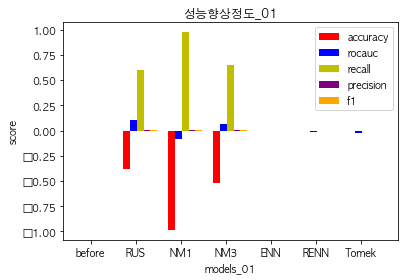

In [17]:
X = np.arange(len(model_list))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side

plt.bar(X , score_01["accuracy improvement"], color = 'r', width = 0.15)
plt.bar(X + 0.15, score_01["rocauc improvement"], color = 'b', width = 0.15)
plt.bar(X + 0.3, score_01["recall improvement"], color = 'y', width = 0.15)
plt.bar(X + 0.45, score_01["precision improvement"], color = 'purple', width = 0.15)
plt.bar(X + 0.6, score_01["f1_Score improvement"], color = 'orange', width = 0.15)

# Creating the legend of the bars in the plot
plt.legend(['accuracy', 'rocauc', 'recall', 'precision', 'f1'])

# Overiding the x axis with the country names
plt.xticks([i + 0.2 for i in range(7)], ["before", "RUS", "NM1", "NM3", "ENN", "RENN", "Tomek"])
# Giving the tilte for the plot
plt.title("성능향상정도_01")
# Namimg the x and y axis
plt.xlabel('models_01')
plt.ylabel('score')

# Displaying the bar plot
plt.show()